<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="380" alt="Skills Network Logo">
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [78]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2024-11-24 16:01:30--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104, 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite.6’

m4_survey_data.sqli 100%[===================>]  34.98M  40.5MB/s    in 0.9s    

2024-11-24 16:01:31 (40.5 MB/s) - ‘m4_survey_data.sqlite.6’ saved [36679680/36679680]



Connect to the database.


In [79]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite")

In [80]:
try:
    conn = sqlite3.connect("m4_survey_data.sqlite") 
    print("Connection successful!")
    conn.close()
except sqlite3.Error as e:
    print(f"Error connecting to SQLite: {e}")

Connection successful!


Import pandas module.


In [19]:
import pandas as pd

In [81]:
import matplotlib.pyplot as plt
import requests

## Demo: How to run an sql query


In [23]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM sqlite_master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

ProgrammingError: Cannot operate on a closed database.

## Demo: How to list all tables


In [21]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)

ProgrammingError: Cannot operate on a closed database.

## Demo: How to run a group by query


In [10]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

DatabaseError: Execution failed on sql '
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
': no such table: master

## Demo: How to describe a table


In [11]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

IndexError: index 0 is out of bounds for axis 0 with size 0

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


In [82]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite"


In [83]:
response = requests.get(file_path)
local_file = "m4_survey_data.sqlite"
with open(local_file, "wb") as file:
    file.write(response.content)

In [84]:
query = "SELECT name FROM sqlite_master WHERE type='table';"
tables = pd.read_sql(query, connection)
print(tables)

ProgrammingError: Cannot operate on a closed database.

In [85]:
connection = sqlite3.connect(local_file)

query = "SELECT name FROM sqlite_master WHERE type='table';"
tables = pd.read_sql(query, connection)
print(tables)

data_query = "SELECT * FROM master"
df = pd.read_sql(data_query, connection)

                      name
0                 EduOther
1                  DevType
2                  LastInt
3               JobFactors
4                 WorkPlan
5            WorkChallenge
6       LanguageWorkedWith
7   LanguageDesireNextYear
8       DatabaseWorkedWith
9   DatabaseDesireNextYear
10      PlatformWorkedWith
11  PlatformDesireNextYear
12      WebFrameWorkedWith
13  WebFrameDesireNextYear
14      MiscTechWorkedWith
15  MiscTechDesireNextYear
16              DevEnviron
17              Containers
18               SOVisitTo
19            SONewContent
20                  Gender
21               Sexuality
22               Ethnicity
23                  master


In [40]:
data_query = "SELECT * FROM master"
df = pd.read_sql(data_query, connection)

In [41]:
connection.close()

In [42]:
print(df.head())

   index  Respondent                      MainBranch Hobbyist  \
0      0           4  I am a developer by profession       No   
1      1           9  I am a developer by profession      Yes   
2      2          13  I am a developer by profession      Yes   
3      3          16  I am a developer by profession      Yes   
4      4          17  I am a developer by profession      Yes   

                                         OpenSourcer  \
0                                              Never   
1                         Once a month or more often   
2  Less than once a month but more than once per ...   
3                                              Never   
4  Less than once a month but more than once per ...   

                                          OpenSource          Employment  \
0  The quality of OSS and closed source software ...  Employed full-time   
1  The quality of OSS and closed source software ...  Employed full-time   
2  OSS is, on average, of HIGHER quality tha

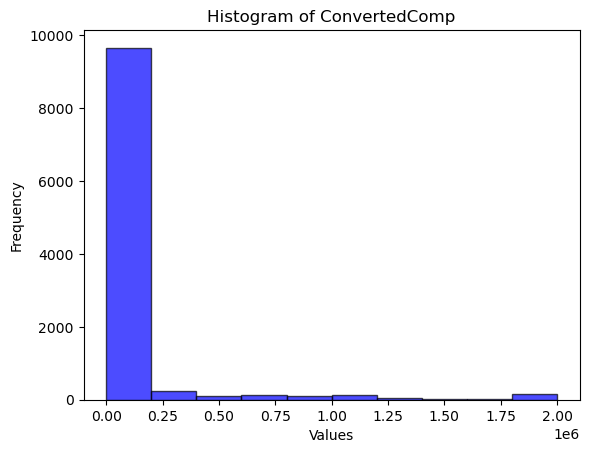

In [43]:
plt.hist(df['ConvertedComp'], bins=10, edgecolor='black', alpha=0.7, color='blue')
plt.title('Histogram of ConvertedComp')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

### Box Plots


Plot a box plot of `Age.`


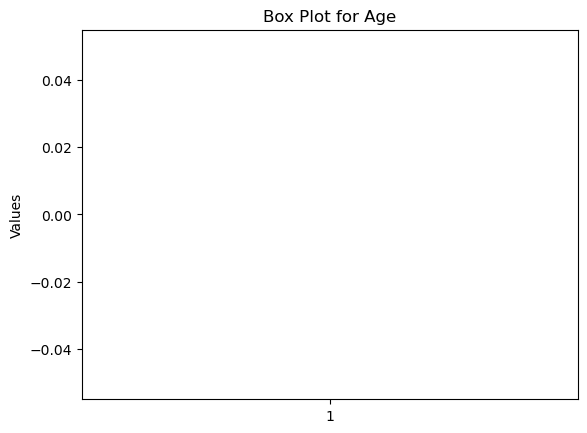

In [44]:
plt.boxplot(df['Age'])

plt.title('Box Plot for Age')
plt.ylabel('Values')

plt.show()

## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


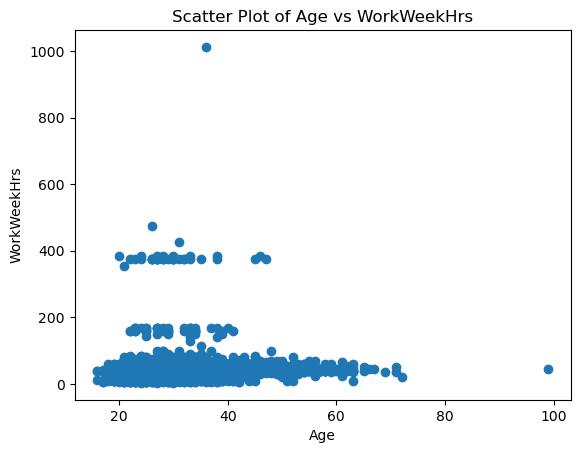

In [45]:
plt.scatter(df['Age'], df['WorkWeekHrs'])

plt.title('Scatter Plot of Age vs WorkWeekHrs')
plt.xlabel('Age')
plt.ylabel('WorkWeekHrs')


plt.show()

### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


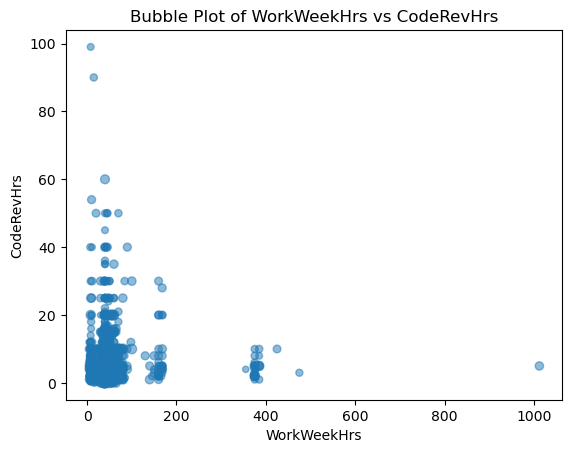

In [46]:
plt.scatter(df['WorkWeekHrs'], df['CodeRevHrs'], s=df['Age'], alpha=0.5)

plt.title('Bubble Plot of WorkWeekHrs vs CodeRevHrs')
plt.xlabel('WorkWeekHrs')
plt.ylabel('CodeRevHrs')

plt.show()

In [53]:
print (df.columns)

Index(['index', 'Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer',
       'OpenSource', 'Employment', 'Country', 'Student', 'EdLevel',
       'UndergradMajor', 'OrgSize', 'YearsCode', 'Age1stCode', 'YearsCodePro',
       'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney', 'MgrWant', 'JobSeek',
       'LastHireDate', 'FizzBuzz', 'ResumeUpdate', 'CurrencySymbol',
       'CurrencyDesc', 'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs',
       'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev', 'CodeRevHrs', 'UnitTests',
       'PurchaseHow', 'PurchaseWhat', 'OpSys', 'BlockchainOrg', 'BlockchainIs',
       'BetterLife', 'ITperson', 'OffOn', 'SocialMedia', 'Extraversion',
       'ScreenName', 'SOVisit1st', 'SOVisitFreq', 'SOFindAnswer',
       'SOTimeSaved', 'SOHowMuchTime', 'SOAccount', 'SOPartFreq', 'SOJobs',
       'EntTeams', 'SOComm', 'WelcomeChange', 'Age', 'Trans', 'Dependents',
       'SurveyLength', 'SurveyEase'],
      dtype='object')


## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.

In [86]:
connection = sqlite3.connect(local_file)
data_query = "SELECT * FROM DatabaseDesireNextYear"
df = pd.read_sql(data_query, connection)

In [87]:
print (df.columns)

Index(['Respondent', 'DatabaseDesireNextYear'], dtype='object')


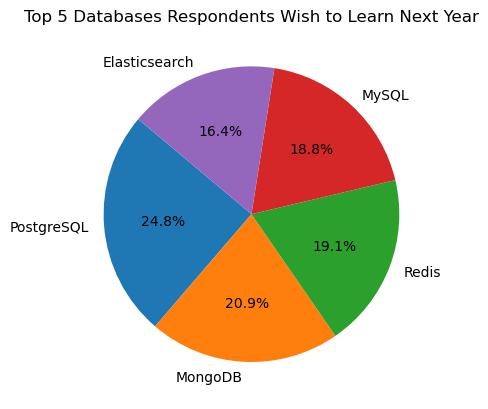

In [88]:
top_databases = df['DatabaseDesireNextYear'].value_counts().head(5)

plt.pie(top_databases, labels=top_databases.index, autopct='%1.1f%%', startangle=140)

plt.title('Top 5 Databases Respondents Wish to Learn Next Year')

plt.show()

### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.

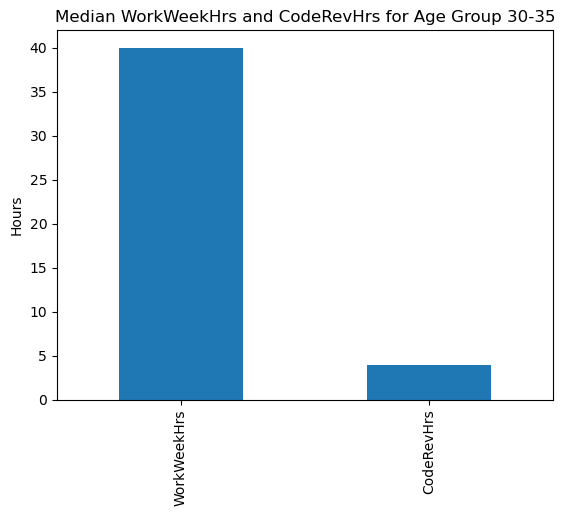

In [47]:
filtered_df = df[(df['Age'] >= 30) & (df['Age'] <= 35)]

median_data = filtered_df[['WorkWeekHrs', 'CodeRevHrs']].median()

median_data.plot(kind='bar', stacked=True)

plt.title('Median WorkWeekHrs and CodeRevHrs for Age Group 30-35')
plt.ylabel('Hours')

plt.show()

## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


In [89]:
connection = sqlite3.connect(local_file)
data_query = "SELECT * FROM master"
df = pd.read_sql(data_query, connection)

In [90]:
print (df.columns)

Index(['index', 'Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer',
       'OpenSource', 'Employment', 'Country', 'Student', 'EdLevel',
       'UndergradMajor', 'OrgSize', 'YearsCode', 'Age1stCode', 'YearsCodePro',
       'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney', 'MgrWant', 'JobSeek',
       'LastHireDate', 'FizzBuzz', 'ResumeUpdate', 'CurrencySymbol',
       'CurrencyDesc', 'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs',
       'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev', 'CodeRevHrs', 'UnitTests',
       'PurchaseHow', 'PurchaseWhat', 'OpSys', 'BlockchainOrg', 'BlockchainIs',
       'BetterLife', 'ITperson', 'OffOn', 'SocialMedia', 'Extraversion',
       'ScreenName', 'SOVisit1st', 'SOVisitFreq', 'SOFindAnswer',
       'SOTimeSaved', 'SOHowMuchTime', 'SOAccount', 'SOPartFreq', 'SOJobs',
       'EntTeams', 'SOComm', 'WelcomeChange', 'Age', 'Trans', 'Dependents',
       'SurveyLength', 'SurveyEase'],
      dtype='object')


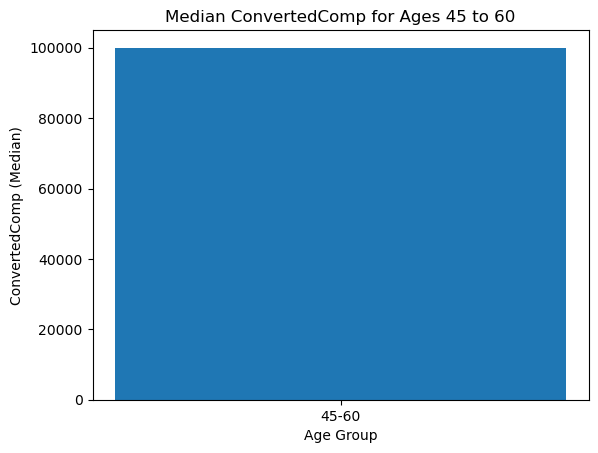

In [91]:
filtered_df = df[(df['Age'] >= 45) & (df['Age'] <= 60)]

median_converted_comp = filtered_df['ConvertedComp'].median()

plt.bar(['45-60'], [median_converted_comp])

plt.title('Median ConvertedComp for Ages 45 to 60')
plt.ylabel('ConvertedComp (Median)')
plt.xlabel('Age Group')

plt.show()

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


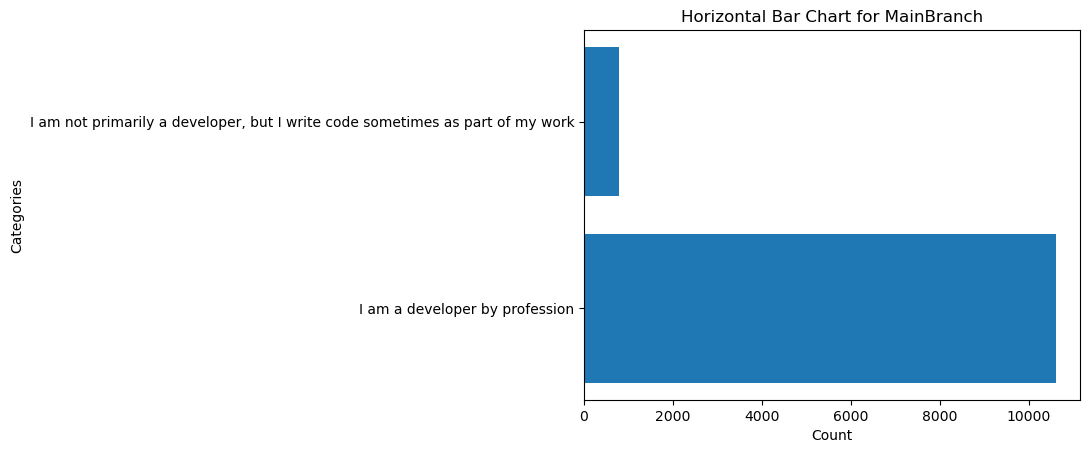

In [92]:
column_data = df['MainBranch'].value_counts()

plt.barh(column_data.index, column_data.values)

plt.title('Horizontal Bar Chart for MainBranch')
plt.xlabel('Count')
plt.ylabel('Categories')


plt.show()

Close the database connection.


In [93]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).


<!--## Change Log


<!--| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |--!>
